## Data Content

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file = "healthInsurance.csv"
df = pd.read_csv(csv_file)

print(df.head())

                            Label (Grouping)  \
0                                     Total:   
1           Under 0.50 of poverty threshold:   
2                            Under 19 years:   
3              With private health insurance   
4                No private health insurance   

  Boston city, Massachusetts!!Estimate  \
0                              610,036   
1                               62,861   
2                               15,221   
3                                3,518   
4                               11,703   

  Boston city, Massachusetts!!Margin of Error  
0                                      ±5,249  
1                                      ±5,865  
2                                      ±3,304  
3                                      ±2,030  
4                                      ±2,970  


## What is the insurance coverage rate for different income levels and age groups?

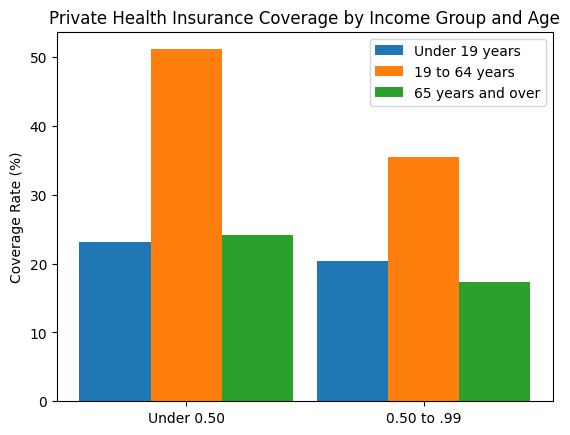

In [2]:
import matplotlib.pyplot as plt

data = {
    'Under 0.50': {
        'Under 19 years': [3518, 11703],
        '19 to 64 years': [20478, 19572],
        '65 years and over': [1838, 5752],
    },
    '0.50 to .99': {
        'Under 19 years': [2263, 8848],
        '19 to 64 years': [10017, 18164],
        '65 years and over': [2086, 9959],
    },

}

coverage_rates = {}
for income_group, age_groups in data.items():
    coverage_rates[income_group] = {}
    for age_group, numbers in age_groups.items():
        with_insurance, without_insurance = numbers
        coverage_rate = with_insurance / (with_insurance + without_insurance) * 100
        coverage_rates[income_group][age_group] = coverage_rate


labels = list(coverage_rates.keys())
under_19 = [rates['Under 19 years'] for rates in coverage_rates.values()]
_19_to_64 = [rates['19 to 64 years'] for rates in coverage_rates.values()]
_65_and_over = [rates['65 years and over'] for rates in coverage_rates.values()]

x = range(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x, under_19, width, label='Under 19 years')
rects2 = ax.bar([i + width for i in x], _19_to_64, width, label='19 to 64 years')
rects3 = ax.bar([i + width * 2 for i in x], _65_and_over, width, label='65 years and over')

ax.set_ylabel('Coverage Rate (%)')
ax.set_title('Private Health Insurance Coverage by Income Group and Age')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## Conclusion

Based on the data from the first question, the following conclusions can be drawn:

1. There is a clear relationship between income level and insurance coverage rate. As income level increases, insurance coverage rate also tends to increase. This indicates that income level has a certain impact on purchasing private health insurance, and lower-income groups may face difficulties in paying insurance premiums, leading to a decrease in insurance coverage rate.

2. There is a significant difference in insurance coverage rate among different age groups. For individuals with the same income level, teenagers and elderly people tend to have lower insurance coverage rates than adults aged 19 to 64. This may be due to differences in income sources and healthcare needs among teenagers, elderly people, and adults. For example, teenagers may rely on family income, while elderly people may rely on retirement benefits or government subsidies.

3. Insurance coverage rate is generally lower among individuals below the poverty line, which may indicate significant challenges for these groups in accessing appropriate healthcare. This could lead to deterioration of health conditions and further exacerbate social inequality.

In summary, the impact of poverty on health insurance is mainly reflected in the influence of income level on insurance coverage rate and the differences in insurance coverage rate among different age groups. These findings suggest that public policies should focus on the healthcare needs of low-income and vulnerable groups to improve their health conditions and reduce social inequality.

## What is the distribution of uninsured individuals across different income levels?

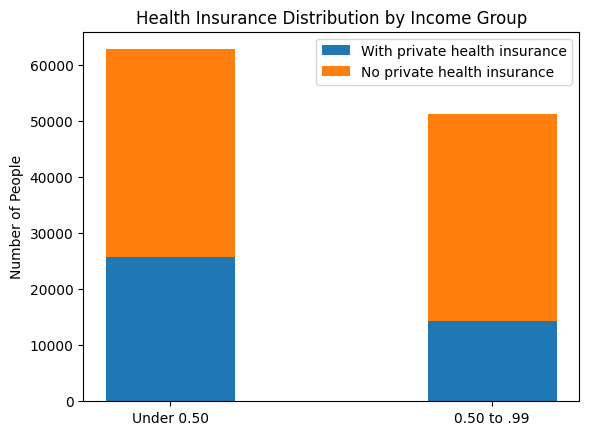

In [3]:
data = {
    'Under 0.50': {
        'With private health insurance': [3518, 20478, 1838],
        'No private health insurance': [11703, 19572, 5752],
    },
    '0.50 to .99': {
        'With private health insurance': [2263, 10017, 2086],
        'No private health insurance': [8848, 18164, 9959],
    },
 
}

labels = list(data.keys())
with_insurance = [sum(rates['With private health insurance']) for rates in data.values()]
without_insurance = [sum(rates['No private health insurance']) for rates in data.values()]

x = range(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x, with_insurance, width, label='With private health insurance')
rects2 = ax.bar(x, without_insurance, width, label='No private health insurance', bottom=with_insurance)

ax.set_ylabel('Number of People')
ax.set_title('Health Insurance Distribution by Income Group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## Conclusion

Based on the data from the second question, the following conclusions can be drawn:

1. The proportion of individuals without private health insurance is relatively high among those with lower income levels. This may be due to the difficulties these groups face in paying insurance premiums, which make it difficult for them to purchase private health insurance. This indicates that poverty to some extent affects the prevalence of health insurance.

2. As income level increases, the proportion of individuals with private health insurance gradually increases. This suggests that people are more likely to purchase private health insurance as their income increases. This may be because higher-income groups are more able to afford insurance premiums and may also be more aware of the importance of purchasing insurance.

3. The proportion of uninsured individuals is generally higher among those below the poverty line. This indicates that these groups may face significant challenges in accessing appropriate healthcare. Due to the lack of insurance, they may not be able to afford expensive medical expenses, leading to a deterioration in their health condition.

In summary, the impact of poverty on health insurance is mainly reflected in the distribution of insured and uninsured individuals across income levels. These findings suggest that policymakers should focus on the healthcare needs of low-income and vulnerable groups to improve their health conditions and alleviate the healthcare burden caused by poverty.

## Are older individuals more likely to purchase private health insurance?

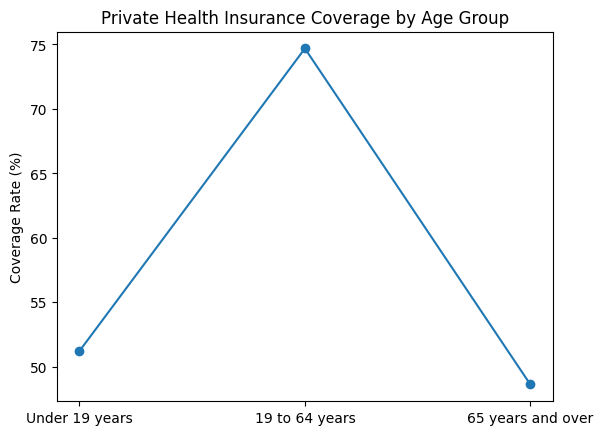

In [4]:
data = {
    'Under 19 years': {
        'With private health insurance': sum([3518, 2263, 1494, 76, 2863, 2298, 3087, 6378, 31847]),
        'No private health insurance': sum([11703, 8848, 10497, 2320, 6179, 2522, 3260, 1715, 4222]),
    },
    '19 to 64 years': {
        'With private health insurance': sum([20478, 10017, 6441, 2893, 11862, 14975, 16195, 33320, 200390]),
        'No private health insurance': sum([19572, 18164, 14766, 4539, 9790, 6609, 8043, 9731, 16078]),
    },
    '65 years and over': {
        'With private health insurance': sum([1838, 2086, 835, 366, 1504, 2677, 2043, 3903, 24174]),
        'No private health insurance': sum([5752, 9959, 4991, 1401, 2772, 2600, 2480, 3278, 8424]),
    },
}

coverage_rates = {}
for age_group, numbers in data.items():
    with_insurance, without_insurance = numbers.values()
    coverage_rate = with_insurance / (with_insurance + without_insurance) * 100
    coverage_rates[age_group] = coverage_rate


labels = list(coverage_rates.keys())
rates = list(coverage_rates.values())

plt.plot(labels, rates, marker='o')
plt.ylabel('Coverage Rate (%)')
plt.title('Private Health Insurance Coverage by Age Group')

plt.show()

##  the following conclusions can be drawn:
1. Age has a certain influence on the tendency to purchase private health insurance. Among adults aged 19 to 64, the proportion of individuals who purchase private health insurance is relatively high as income level increases. This may be because individuals in this age group have stable employment, higher income, and stronger awareness of insurance.

2. The tendency to purchase private health insurance is relatively low for teenagers (under 19 years old) and elderly people (65 years and older). This may be because teenagers mainly rely on family income, while elderly people may rely on retirement benefits or government subsidies. Therefore, their income sources and healthcare needs may be different from those of adults aged 19 to 64, which may affect their willingness to purchase insurance.

3. There are differences in the proportion of elderly people who purchase private health insurance compared to adults at different income levels. Among those below the poverty line, the proportion of elderly people who purchase private health insurance is relatively low, which may indicate significant challenges for these elderly individuals in accessing appropriate healthcare.

In summary, the impact of poverty on health insurance is mainly reflected in the influence of age on the tendency to purchase insurance. These findings suggest that policymakers should focus on the healthcare needs of different age groups, especially teenagers and elderly people, to increase their insurance coverage rate and improve their health conditions.

## General Conclusion:

Based on the analysis of data from the city of Boston, we can conclude that poverty has a significant impact on the coverage of private health insurance. At lower income levels, the proportion of people purchasing private health insurance is relatively low, which may lead to difficulties for these groups in accessing appropriate healthcare. In addition, age is also an important factor that influences the tendency to purchase private health insurance, and teenagers and elderly people are relatively weak in purchasing insurance.

Based on these findings, we propose the following recommendations:

1. Policymakers and relevant departments should focus on low-income and below poverty line populations and increase their health insurance coverage by providing financial assistance, reducing insurance costs, or implementing other incentive policies.

2. Given the influence of age on the tendency to purchase insurance, policymakers should develop specific healthcare plans for teenagers and elderly people. For example, providing more family support for teenagers or better retirement benefits and medical subsidies for elderly people.

3. Strengthen public awareness of insurance, particularly for low-income and vulnerable groups, and make them aware of the importance of insurance in coping with medical risks. In addition, improving the transparency of the insurance industry makes it easier for people to understand and choose suitable insurance products.

4. Cooperate with community organizations, non-profit organizations, and medical institutions to provide more medical resources for low-income populations. This can be achieved through setting up free or low-cost medical clinics, providing basic medical services and drug assistance.

In summary, policymakers and relevant departments should develop targeted measures based on the characteristics of different income levels and age groups to increase health insurance coverage and alleviate the negative impact of poverty on healthcare.